In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import scvi
import os
from tqdm import tqdm

sc.set_figure_params(figsize=(6, 4))

In [32]:
adata = sc.read('data/scvi_integration.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 16766 × 2000
    obs: 'batch', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden', '_scvi_raw_norm_scaling'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi', 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/home/badi/anaconda3/envs/ml/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


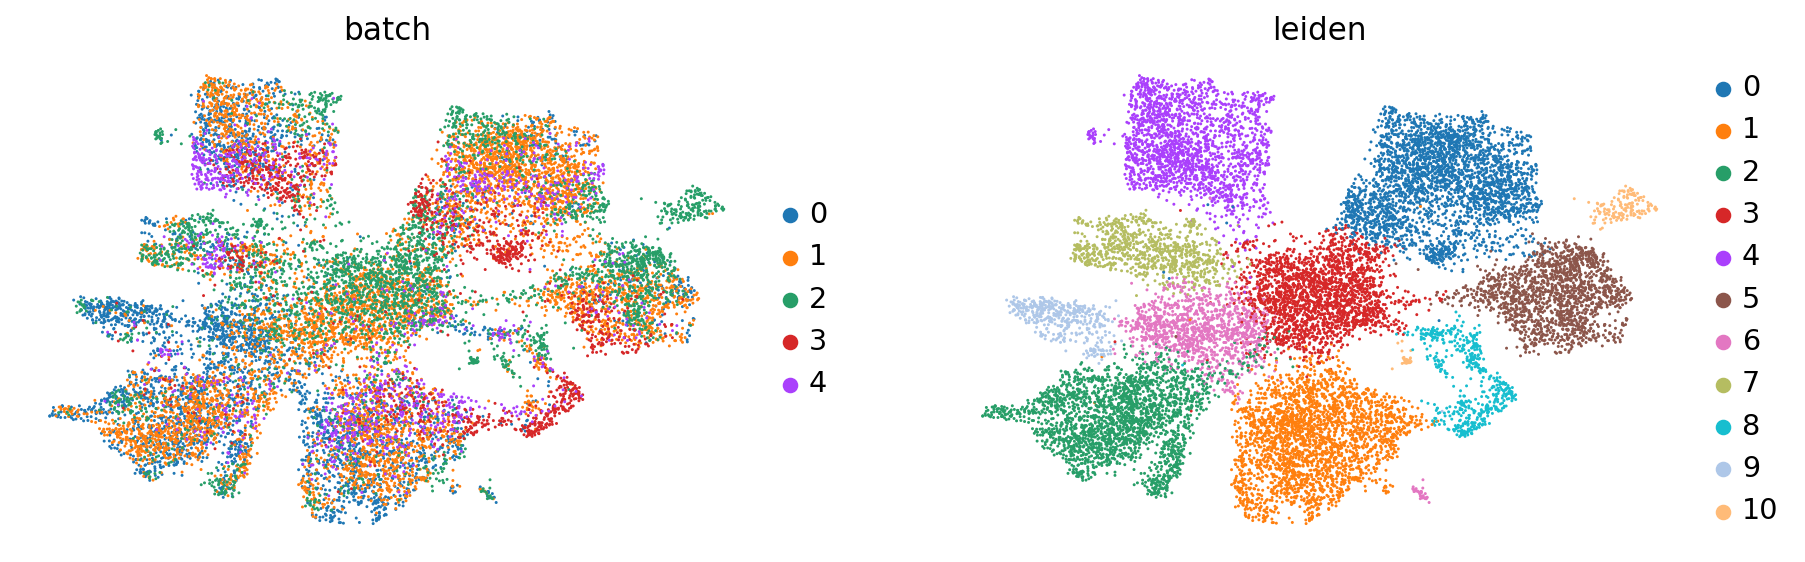

In [4]:
sc.pl.umap(
    adata,
    color=["batch", "leiden"],
    frameon=False,
)

In [5]:
marker_genes = dict()
marker_genes['MP'] = ['CD68','ITGAM','ITGAX','HLA-DRA','CSF1R','CD14']
marker_genes['pDC'] = ['LILRA4', 'CLEC4C', 'GZMB']
marker_genes['ILC'] = ['KLRF1', 'KLRC1', 'GZMA', 'GZMB', 'NKG7']
marker_genes['Tcell'] = ['CD3D', 'CD3E', 'CD3G', 'CD8A']
marker_genes['Bcell'] = ['CD79A', 'CD79B', 'CD19', 'MS4A1']
marker_genes['Plasmacell'] = ['CD79A', 'IGHA2']
marker_genes['Mastcell'] = ['KIT', 'TPSAB1', 'TPSB2']
marker_genes['Endothelia'] = ['PECAM1', 'CDH5', 'ICAM2', 'KDR', 'ERG']
marker_genes['Mesenchyme'] = ['PDGFRB', 'ACTA2', 'COL1A1', 'COL1A2', 'COL3A1', 'DES', 'DCN']
marker_genes['Hepatocyte'] = ['ALB', 'TF', 'TTR', 'HNF4A','CYP2A6']
marker_genes['Cholangiocyte'] = ['EPCAM', 'KRT19', 'CD24']

In [6]:
sc.tl.rank_genes_groups(adata, method='wilcoxon', groupby='leiden')

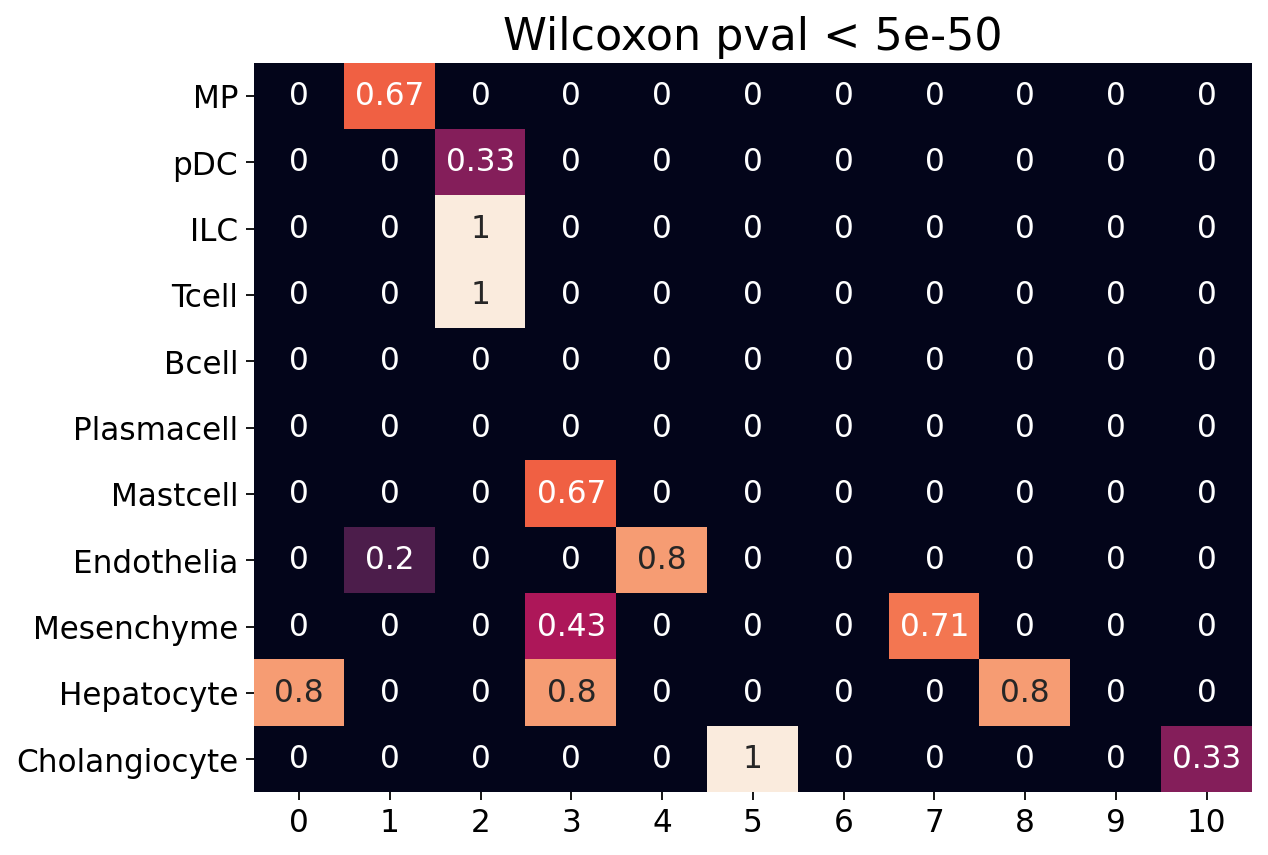

In [7]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.title('Wilcoxon pval < 5e-50', fontsize=20)
cell_annotation_norm = sc.tl.marker_gene_overlap(adata, marker_genes, 
                                                 normalize='reference', adj_pval_threshold=5e-50)
sns.heatmap(cell_annotation_norm, cbar=False, annot=True)
plt.show()

In [27]:
cell_types = []
cell_ids = []
adata.obs['neil_cell_type'] = 'Unidentified'
root_path = 'data/'
lst_dirs = sorted([dname for dname in os.listdir(root_path) if os.path.isdir(root_path+dname) and dname.startswith('2')])
for i,d in enumerate(tqdm(lst_dirs)):
    sample = d.split('_')[-1]
    path = root_path + d + '/premrna_outs/%s_broad_celltype.csv' % sample
    with open(path, 'r') as f:
        f.readline()
        for line in f.readlines():
            cell, ctype = line.rstrip().split(',')
            cell = cell.split('_')[1] + '-1-%s' % i
            #adata.obs['neil_cell_type'].loc[cell] = ctype
            #adata.obs.loc[cell, 'neil_cell_type'] = ctype
            cell_types.append(ctype)
            cell_ids.append(cell)
            
cell_types = np.array(cell_types)
cell_ids = np.array(cell_ids)
            

100%|██████████| 5/5 [00:00<00:00, 306.22it/s]


In [47]:
path = 'data/200313_HLN_POD1021/premrna_outs/filtered_feature_bc_matrix'
adatab = sc.read_10x_mtx(path, cache=True)
cell_idsb = []
path = 'data/200313_HLN_POD1021/premrna_outs/POD1021_broad_celltype.csv'
with open(path, 'r') as f:
    f.readline()
    for line in f.readlines():
        cell, ctype = line.rstrip().split(',')
        cell = cell.split('_')[1]
        cell_idsb.append(cell)

In [49]:
a = np.array([name.split('-')[0] for name in adatab.obs.index])
b = np.array([name.split('-')[0] for name in cell_idsb])
print(len(a))
print(len(b))
len(set(a) & set(b))

4002
3629


3629

In [51]:
adatab.obs

""
AAACCCACAGCACAAG-1
AAACCCAGTAAGTTAG-1
AAACCCAGTCTCGACG-1
AAACCCATCAGACCCG-1
AAACGAAAGGAGACCT-1
...
TTTGTTGAGAACAAGG-1
TTTGTTGAGTCAATCC-1
TTTGTTGCAATGAGCG-1
TTTGTTGGTGGACTAG-1


In [34]:
len(set(cell_ids) & set(adata.obs.index))

1722

In [33]:
len(adata.obs.index)

16766

In [22]:
np.sum(adata.obs.batch.isnull())


11258

In [25]:
cell

'TTTGTTGTCTGTCCCA-1-4'

In [24]:
len(cell_types)

12980

In [26]:
adata.obs

,batch,_scvi_batch,_scvi_labels,_scvi_local_l_mean,_scvi_local_l_var,leiden,_scvi_raw_norm_scaling,neil_cell_type
AAACCCACAGCACAAG-1-0,0,0.0,0.0,5.672735,1.251163,6,91.743118,Unidentified
AAACCCAGTAAGTTAG-1-0,0,0.0,0.0,5.672735,1.251163,4,28.571428,Unidentified
AAACCCAGTCTCGACG-1-0,0,0.0,0.0,5.672735,1.251163,2,44.444447,Unidentified
AAACCCATCAGACCCG-1-0,0,0.0,0.0,5.672735,1.251163,9,26.525198,Unidentified
AAACGAAAGGAGACCT-1-0,0,0.0,0.0,5.672735,1.251163,3,92.592590,Unidentified
...,...,...,...,...,...,...,...,...
TGTTGGAAGCTCCACG-1-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hepatocytes
CAGGGCTAGCGTCTCG-1-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hepatocytes
CTGTAGATCTCGGGAC-1-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endothelia
GTAATGCCACTGGAAG-1-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endothelia


In [11]:
sc.pl.umap(
    adata[adata.obs.neil_cell_type != 'Unidentified'],
    color=["leiden", "neil_cell_type"],
    frameon=False,
)

IndexError: index 16766 is out of bounds for axis 0 with size 16766

In [11]:
print('New Hepa count:', np.sum(np.array(adata.obs.leiden == '0')) + np.sum(np.array(adata.obs.leiden == '8')))
print('Old Hepa count:', np.sum(np.array(adata.obs.neil_cell_type == 'Hepatocytes')))

New Hepa count: 3492
Old Hepa count: 495


In [12]:
adata.obs.neil_cell_type

AAACCCACAGCACAAG-1-0      Unidentified
AAACCCAGTAAGTTAG-1-0      Unidentified
AAACCCAGTCTCGACG-1-0      Unidentified
AAACCCATCAGACCCG-1-0      Unidentified
AAACGAAAGGAGACCT-1-0      Unidentified
                             ...      
TTTGATCGTAACACCT-1-4      Unidentified
TTTGATCTCCTCTTTC-1-4      Unidentified
TTTGGAGTCTTTCAGT-1-4               MPs
TTTGTTGTCCGAGAAG-1-4    Cholangiocytes
TTTGTTGTCTGTCCCA-1-4        Endothelia
Name: neil_cell_type, Length: 16766, dtype: object

In [112]:
sc.tl.pca(adata, svd_solver='arpack')

/home/badi/anaconda3/envs/ml/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


/home/badi/anaconda3/envs/ml/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


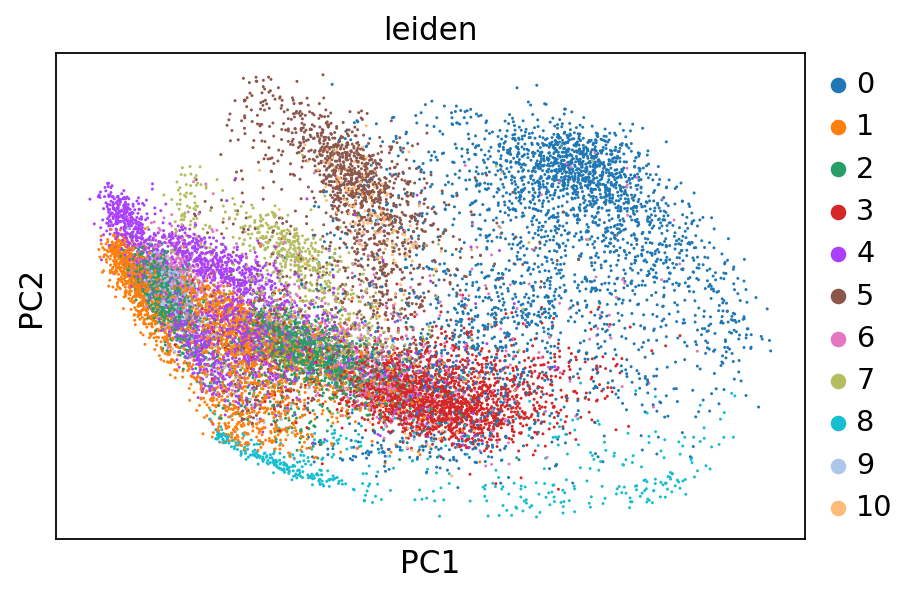

In [114]:
sc.pl.pca(adata, color='leiden')

In [115]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

In [116]:
sc.tl.umap(adata)

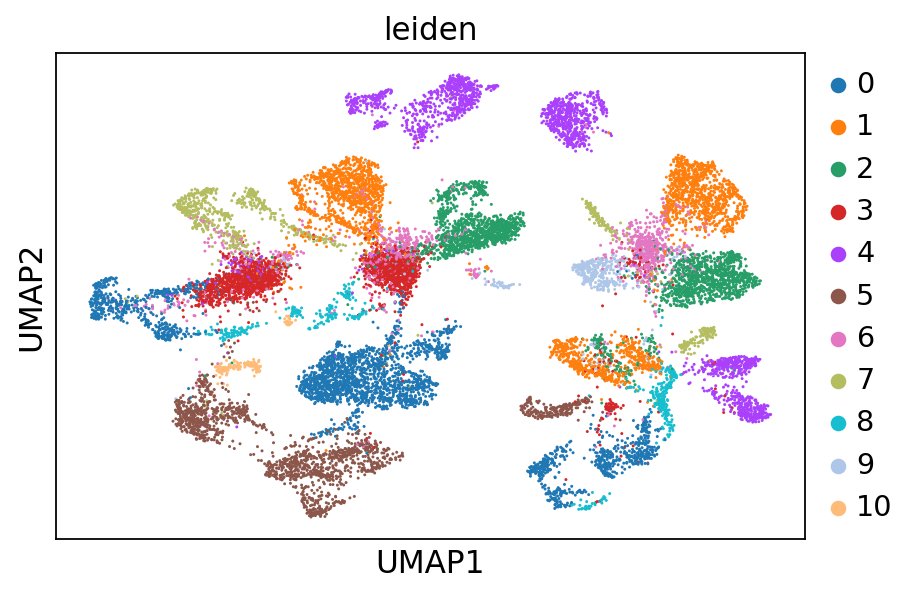

In [118]:
sc.pl.umap(adata, color=['leiden'])

/home/badi/anaconda3/envs/ml/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


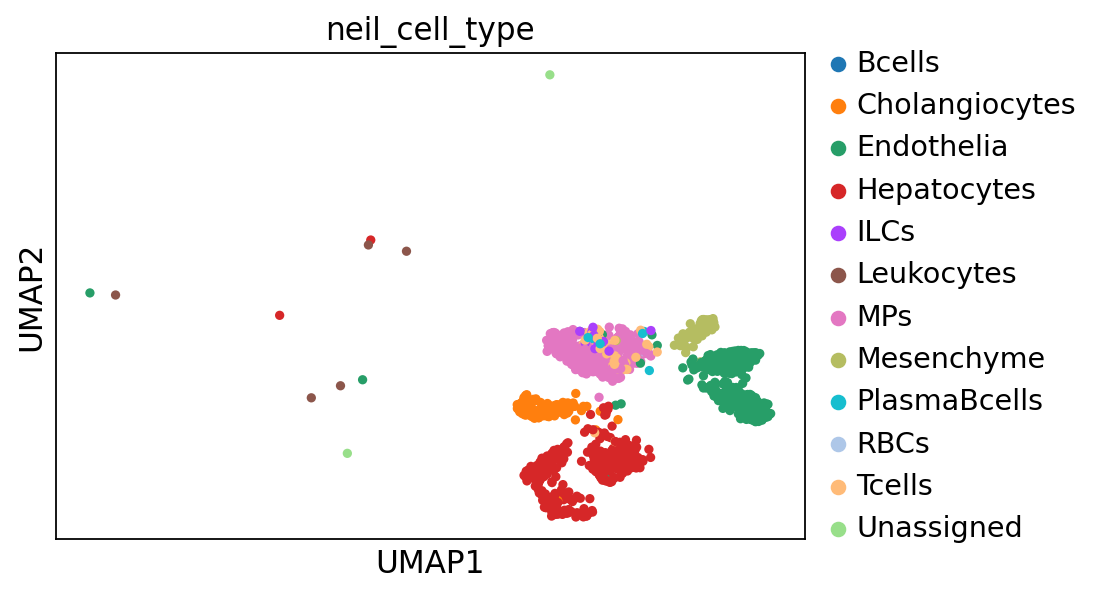

In [120]:
sc.pl.umap(adata[adata.obs.neil_cell_type != 'Unidentified'], color=['neil_cell_type'])

In [ ]:
root_path = 'data/'
lst_dirs = [dname for dname in os.listdir(root_path) if os.path.isdir(root_path+dname) and not dname.startswith('.')]
adatas = []

for i,d in enumerate(tqdm(lst_dirs)):
    path = root_path + d + '/premrna_outs/filtered_feature_bc_matrix'
    if i == 0:
        adata = sc.read_10x_mtx(path, cache=True)
    else:
        tmp = sc.read_10x_mtx(path, cache=True)
        adatas.append(tmp)

In [ ]:
adata

In [ ]:
adata = adata.concatenate(adatas)

In [ ]:
adata.obs

In [ ]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata  # keep full dimension safe
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="counts",
    batch_key="batch",
    subset=True
)

In [ ]:
scvi.data.setup_anndata(adata, layer="counts", batch_key="batch")

In [ ]:
vae = scvi.model.SCVI(adata)

In [ ]:
vae.train()

In [ ]:
np.unique(list(adata.obs['batch']))

In [ ]:
adata

In [ ]:
#gene_dict = {}
#with open('data/mart_export.txt', 'r') as f:
#    f.readline()
#    for line in f.readlines():
#        line = line.rstrip()
#        gene, length = line.split(',')
#        gene_dict.setdefault(gene, [])
#        gene_dict[gene].append(int(length))
#        
#for gene in gene_dict:
#    gene_dict[gene] = np.round(np.mean(gene_dict[gene]), 2)

In [ ]:
set(adata.var.gene_ids) - set(gene_dict.keys())

In [ ]:
len(set(adata.var.gene_ids) - set(gene_dict.keys()))

In [ ]:
gene_dict

In [ ]:
adata.var.loc['TRBD1']

In [ ]:
np.sum(adata.var.gene_ids == 'ENSG00000282431')

In [ ]:
!wget ftp://ftp.ensembl.org/pub/grch37/current/fasta/homo_sapiens/cds/Homo_sapiens.GRCh37.cds.all.fa.gz -P data/
!gunzip data/Homo_sapiens.GRCh37.cds.all.fa.gz data/

!wget ftp://ftp.ensembl.org/pub/grch37/current/fasta/homo_sapiens/ncrna/Homo_sapiens.GRCh37.ncrna.fa.gz -P data/
!gunzip data/Homo_sapiens.GRCh37.ncrna.fa.gz data/

!wget ftp://ftp.ensembl.org/pub/grch37/current/fasta/homo_sapiens/cdna/Homo_sapiens.GRCh37.cdna.all.fa.gz -P data/
!gunzip data/Homo_sapiens.GRCh37.cdna.all.fa.gz data/

In [ ]:
gene_dict = dict()

with open('data/Homo_sapiens.GRCh37.cds.all.fa', 'r') as f:
    for line in f.readlines():
        line = line.rstrip()
        if line.startswith('>'):
            line = line.split()
            gene = line[6][12:]
        else:
            gene_dict.setdefault(gene, [])
            gene_dict[gene].append(len(line))
            
with open('data/Homo_sapiens.GRCh37.ncrna.fa', 'r') as f:
    for line in f.readlines():
        line = line.rstrip()
        if line.startswith('>'):
            line = line.split()
            gene = line[6][12:]
        else:
            gene_dict.setdefault(gene, [])
            gene_dict[gene].append(len(line))
    
with open('data/Homo_sapiens.GRCh37.cdna.all.fa', 'r') as f:
    for line in f.readlines():
        line = line.rstrip()
        if line.startswith('>'):
            line = line.split()
            gene = line[6][12:]
        else:
            gene_dict.setdefault(gene, [])
            gene_dict[gene].append(len(line))
            
            
            
#for k in gene_dict:
#    gene_dict[k] = np.round(np.mean(gene_dict[k]), 2)
    
print(len(adata.var.index))
len(set(adata.var.index) & set(gene_dict.keys()))

In [ ]:
lst_genes = []
with open('data/Homo_sapiens.GRCh37.cds.all.fa', 'r') as f:
    genes = f.read().split(">")
    genes.pop(0)
    for gene in genes:
        lst_genes.append(gene.split("\n")[0].split()[3][5:].split('.')[0])

In [ ]:
genes[-2].split("\n")

In [ ]:
len(set(adata.var.gene_ids) - set(lst_genes))

In [ ]:
gene_dict

In [ ]:
np.sum([name.startswith('MT-') for name in gene_dict.keys()])

In [ ]:
sc.pp.filter_genes(adata, min_counts=3)
sc.pp.filter_cells(adata, min_counts=3)

In [ ]:
adata

In [ ]:
len(set(adata.var.index) & set(gene_dict.keys()))

In [ ]:
gene_dict = dict()

with open('data/Homo_sapiens.GRCh38.cds.all.fa', 'r') as f:
    for line in f.readlines():
        line = line.rstrip()
        if line.startswith('>'):
            line = line.split()
            gene = line[3][5:].split('.')[0]
        else:
            gene_dict.setdefault(gene, [])
            gene_dict[gene].append(len(line))
    
#for k in gene_dict:
#    gene_dict[k] = np.round(np.mean(gene_dict[k]), 2)
    
print(len(adata.var.index))
len(set(adata.var.gene_ids) & set(gene_dict.keys()))

In [ ]:
len(gene_dict)

In [ ]:
gene_dict

In [ ]:
adata.var

In [ ]:
gene

In [ ]:
line

In [ ]:
15118 - 13356

In [ ]:
np.array([name.startswith('MT-') for name in gene_dict.keys()])